#3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.


In [3]:
#Load the provided dataset and import in pandas DataFrame.
import pandas as pd
bank=pd.read_csv('/content/drive/MyDrive/AI/bank.csv')
bankdf=pd.DataFrame(bank)
print("\n Load Dataset")
print(bankdf)

#Check info of the DataFrame and identify following:
#(a) columns with dtypes=object
print("\n Column Object")
bank.info()
col_obj=bank.select_dtypes(include=['object']).columns
print(col_obj)

#(b) unique values of those columns.
print("\n")
for col in col_obj:
  print("Unique Columns",bank[col].unique())

#(c) check for the total number of null values in each column.
print("\n")
print("Null Values",bank.isnull().sum())

#Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in ”.csv” with name ”banknumericdata.csv”
bank_new=bank.select_dtypes(exclude='object')
bank_new.to_csv("banknumericdata.csv")

#4. Read ”banknumericdata.csv” and Find the summary statistics.
print('\n')
print("Summary statistics")
bank_read=pd.read_csv("banknumericdata.csv")
print(bank_read.describe())


 Load Dataset
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duratio

#3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"
Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

Fare Statatics
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


Null values in Age= 30
Null values in Age= 0


Embarked Column
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Embarked_C  Embarked_Q  \
0      0         A/5 21171   7.2500   NaN        S       False       False 

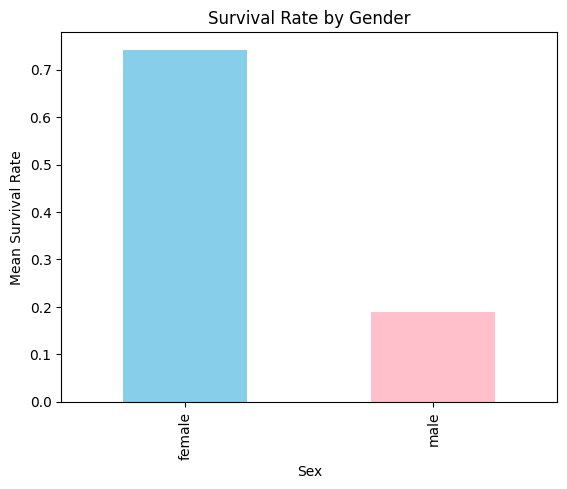



Visualization


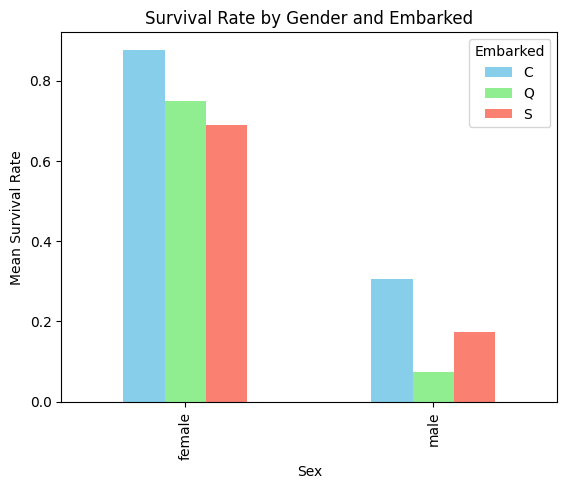

In [4]:
#Problem - 1:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

titanic=pd.read_csv("/content/drive/MyDrive/AI/Titanic-Dataset.csv")
titanicdf=pd.DataFrame(titanic)
subset_df=titanicdf[['Name','Pclass','Sex','Age','Fare','Survived']]
first_class_df = subset_df[subset_df['Pclass']==1]
print("Fare Statatics")
print("Mean Fare:",first_class_df['Fare'].mean())
print("Median Fare:", first_class_df['Fare'].median())
print("Max Fare:", first_class_df['Fare'].max())
print("Min Fare:", first_class_df['Fare'].min())

#Problem - 2:How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
#this out, drop them from your DataFrame.
print("\n")
print("Null values in Age=",first_class_df['Age'].isnull().sum())
first_class_df=first_class_df.dropna(subset=['Age'])
print("Null values in Age=",first_class_df['Age'].isnull().sum())

#Problem-3
print("\n")
print("Embarked Column")
embark_df=pd.get_dummies(titanicdf['Embarked'],prefix='Embarked')
titanicdf=pd.concat([titanicdf,embark_df],axis=1)
#titanicdf.drop('Embarked',axis=1,inplace=True)
print(titanicdf.head())

#Problem-4
print("\n")
print("Visualization")
print(titanicdf.groupby('Sex')['Survived'].mean())
survival_by_sex = titanicdf.groupby('Sex')['Survived'].mean()
survival_by_sex.plot(kind='bar', color=['skyblue', 'pink'])
plt.title("Survival Rate by Gender")
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.show()

#Problem-5
print("\n")
print("Visualization")
survival_grouped = titanicdf.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()
survival_grouped.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Survival Rate by Gender and Embarked")
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.legend(title='Embarked')
plt.show()

#Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}


In [5]:
#1. Load the provided dataset and import in pandas DataFrame.
import pandas as pd
medical=pd.read_csv('/content/drive/MyDrive/AI/medical_students_dataset.csv')
medicaldf=pd.DataFrame(medical)
print("\n Load Dataset")
print(medicaldf)

#2. Check info of the DataFrame and identify column with missing (null) values.
print("\n Column Object")
medical.info()
col_null=medical.isnull().sum()
print(col_null)

#3. For the column with missing values fill the values using various techniques we discussed above. Try
#to explain why did you select the particular methods for particular column.
for col in medical.columns:
  if medical[col].isnull().sum()>0:
    if medical[col].dtype == 'object':
            medical[col].fillna(medical[col].mode()[0])
    else:
         medical[col].fillna(medical[col].mean())

#4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
print("\n")
print("Drop Dupliactes")
print("Duplicate values=",medical.duplicated().sum())
medical.drop_duplicates()


 Load Dataset
        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0              1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1              2.0   NaN    Male  152.069157  47.630941          B        NaN   
2              3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3              NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4              5.0  23.0  Female         NaN  46.234173          O        NaN   
...            ...   ...     ...         ...        ...        ...        ...   
199995         NaN  24.0    Male  176.503260  95.756997          B  30.737254   
199996     99997.0  29.0  Female  163.917675  45.225194        NaN  16.831734   
199997     99998.0  34.0  Female         NaN  99.648914        NaN  33.189303   
199998     99999.0  30.0  Female  156.446944  50.142824          A  20.486823   
199999    100000.0  20.0  Female  153.927409  99.928405          O  42.175189   

        Temp

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No
